<a href="https://colab.research.google.com/github/kpullabhotla/NeuralNetworks/blob/main/LogisticRegression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import torch
from torch.utils.data import random_split
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix


In [ ]:
np.random.seed(12)
num_observations = 5000

x1 = np.random.multivariate_normal([0, 0],[[1, .75],[.75, 1]], num_observations)
x2 = np.random.multivariate_normal([1, 4],[[1, .75],[.75, 1]], num_observations)

features = np.vstack((x1,x2)).astype(np.float32)
labels = np.hstack((np.full(num_observations,-1),np.ones(num_observations)))


## Plotting Entire Data

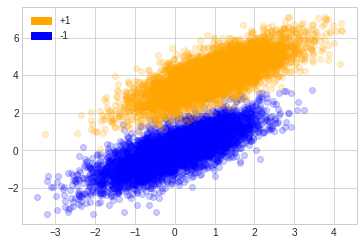

In [ ]:
plt.style.use('seaborn-whitegrid')

ftr_1 = mpatches.Patch(color='orange', label='+1')
ftr_2 = mpatches.Patch(color='blue', label='-1')

figure, plts= plt.subplots()

plts.scatter(x1[:,0], x1[:,1], color="blue", alpha=0.2)
plts.scatter(x2[:,0], x2[:,1], color="orange", alpha=0.2)



plts.legend(handles=[ftr_1, ftr_2])

In [ ]:
training_dataset, testing_dataset,training_labelset, testing_labelset  = train_test_split(features,labels, test_size=0.2)


## Linear Function

In [ ]:
bias = -8
def linear_classifier(features, weights):
  linear_val = np.sum(weights * features,axis=1)
  return linear_val + bias

## Cost Function

In [ ]:
def cost_function(features, label, weights):

   loss_temp = 1 + np.exp(-label * linear_classifier(features, weights))
   loss = np.sum(np.log(loss_temp))

   return loss/features.shape[0]



## Gradient Function

In [ ]:
def calc_gradient(features, label, weights):

  label = np.array(label,ndmin=2)
  nume = label.transpose() * features
  gradient_temp = 1 + np.exp(label * linear_classifier(features, weights))  
  gradient = nume/gradient_temp.reshape((gradient_temp.size,1))
  return -gradient

## Logistic Regression

In [ ]:
def logistic_regression_PB(features, label, num_steps, learning_rate):
  weights = np.zeros(features.shape[1])
  total_gradient = 0
  prev_cost = 0

  for step in range(num_steps):
    gradient = calc_gradient(features, label, weights)
    avg_gradient = np.mean(gradient, axis=0)
    weights -= learning_rate * avg_gradient
    cost_func_rate = cost_function(features, label, weights)    
    if step % 1000 == 0:
      print(cost_function(features, label, weights), weights)
  return weights

final_weights = logistic_regression_PB(training_dataset, training_labelset, 40000, 0.01)

3.9603223622598582 [0.00510825 0.02010084]
0.08306275092791944 [0.29306787 3.42118007]
0.06132692023597271 [-0.01966577  3.7545263 ]
0.050748107138449856 [-0.3032295   3.91142949]
0.04361389850456271 [-0.55100333  4.01016488]
0.03841974259663696 [-0.76671109  4.0830728 ]
0.03450984015032603 [-0.95528308  4.1420783 ]
0.031502492193556705 [-1.12112072  4.19240805]
0.02915051010377884 [-1.26786361  4.23667966]
0.027284977103391905 [-1.39848482  4.27636345]
0.025786614167084054 [-1.51541899  4.31237231]
0.024569406564815863 [-1.62066453  4.34532178]
0.02357038086963933 [-1.71586398  4.37565437]
0.02274281752448114 [-1.80237046  4.4037043 ]
0.022051604746894445 [-1.8813034  4.429734 ]
0.021470015912572638 [-1.95359416  4.45395596]
0.020977454385044274 [-2.02002266  4.47654658]
0.02055786012027682 [-2.08124649  4.49765523]
0.02019857147707409 [-2.13782392  4.51741045]
0.019889502699514953 [-2.19023215  4.53592421]
0.019622542539071672 [-2.23888178  4.55329511]
0.019391109512838213 [-2.284128

## Calculating Accuracy - Without Bias

In [ ]:
#Weights when bias=0 are "[-0.69901964  1.04374655]"

final_weight_wob = np.array([-0.69901964,1.04374655])
x_sigmoid = np.sum(testing_dataset * np.array(final_weights),axis=1)
labels_predict = np.where((1/(1+np.exp(-x_sigmoid)))>=0.5, 1.0, -1.0)

#labels_predict = np.where((x_sigmoid) >=0.5, 1.0, -1.0)
accuracy = np.sum(labels_predict == testing_labelset)
print("Accuracy for the given dataset without bias: ",accuracy*100/2000,"%")

Accuracy for the given dataset without bias:  76.85 %


## Calculating Accuracy - with Bias



In [ ]:
x_sigmoid = linear_classifier(testing_dataset,np.array(final_weights))
labels_predict = np.where((1/(1+np.exp(-x_sigmoid)))>=0.5, 1.0, -1.0)

#labels_predict = np.where((x_sigmoid) >=0.5, 1.0, -1.0)
accuracy = np.sum(labels_predict == testing_labelset)
print("Accuracy for the given dataset with bias: ",accuracy*100/2000,"%")





Accuracy for the given dataset with bias:  99.15 %


## Confusion Matrix

In [ ]:

conf_matrix = confusion_matrix(testing_labelset,labels_predict)

print("Confusion Matrix For The Given Dataset :\n\n",conf_matrix)

Confusion Matrix For The Given Dataset :

 [[996   7]
 [ 10 987]]


## Final Weights

In [ ]:
print("Final Weights: ", final_weights)

Final Weights:  [-2.76145379  4.75100559]


## Bias Or Intercept

In [ ]:
print("Bias Value is: ",bias)

Bias Value is:  -8


## Accuracy Using SKlearn LogisticRegression


In [ ]:
skl_model = LogisticRegression().fit(training_dataset, training_labelset)

sk_label_pred = skl_model.predict(testing_dataset)

accuracy_sklearn = np.sum(sk_label_pred == testing_labelset)
print("Percentage of accuracy for the given dataset is: ",accuracy_sklearn*100/2000,"%")

Percentage of accuracy for the given dataset is:  99.1 %


##  SKLearn Predicted vs Model Predicted

In [ ]:
result = sk_label_pred == labels_predict

compare_predicted = pd.DataFrame({"SKLearn Predicted":sk_label_pred,"Model Predicted":labels_predict,"Result":result})

print(compare_predicted)

      SKLearn Predicted  Model Predicted  Result
0                   1.0              1.0    True
1                   1.0              1.0    True
2                  -1.0             -1.0    True
3                   1.0              1.0    True
4                   1.0              1.0    True
...                 ...              ...     ...
1995                1.0              1.0    True
1996               -1.0             -1.0    True
1997               -1.0             -1.0    True
1998                1.0              1.0    True
1999                1.0              1.0    True

[2000 rows x 3 columns]
